# MNIST Handwritten DIgit Classification using Deep Learning

Importing the Dependencies

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [3]:
from PIL import Image
import tensorflow as tf
tf.random.set_seed(42)

In [4]:
from tensorflow.keras.datasets import mnist

In [5]:
from tensorflow.math import confusion_matrix

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


In [7]:
X_train.shape

(60000, 28, 28)

In [9]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

Training data = 60000 images

Test data = 10000 images

image dimension = 28 * 28

grayscale image = 1 channel

In [10]:
X_train[10].shape

(28, 28)

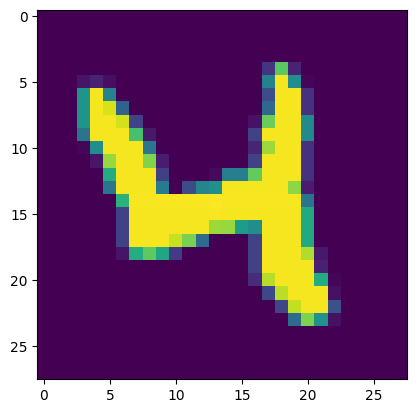

In [15]:
plt.imshow(X_train[20])

All the images have the same dimentsions in this dataset, if not we have to resize all the images to a common dimension

In [ ]:
X_train = X_train/255
X_test = X_test/255

Building the Neural Network

In [16]:
model = tf.keras.Sequential([
                            tf.keras.layers.Flatten(input_shape=(28,28)),
                            tf.keras.layers.Dense(50, activation="relu"),
                            tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(10, activation="sigmoid")
])

In [17]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [18]:
history = model.fit(X_train ,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 4ms/step - loss: 1.3299 - accuracy: 0.8152
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3298 - accuracy: 0.9131
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2655 - accuracy: 0.9299
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2322 - accuracy: 0.9389
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2052 - accuracy: 0.9451
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1841 - accuracy: 0.9502
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1656 - accuracy: 0.9551
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1495 - accuracy: 0.9587
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1382 - accuracy: 0.9613
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0

model accuracy on the train data is 96%

In [19]:
X_test.shape

(10000, 28, 28)

In [20]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [21]:
y_pred.shape

(10000, 10)

In [22]:
y_pred[0]

array([2.31558550e-03, 1.12688085e-02, 1.18286513e-01, 1.87044516e-02,
       2.19663605e-02, 3.62385600e-03, 1.47562561e-04, 9.94545460e-01,
       3.74753545e-05, 4.44652848e-02], dtype=float32)

In [23]:
import numpy as np

In [24]:
label_for_first_img = np.argmax(y_pred[0])
print(label_for_first_img)

7


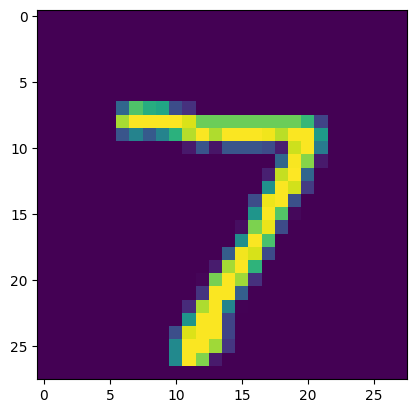

In [25]:
plt.imshow(X_test[0])

In [26]:
y_pred = [np.argmax(i) for i in y_pred]

In [32]:
y_pred[5]

1

## Confusion Matrix

In [34]:
conf_mat = confusion_matrix(y_test, y_pred)

In [35]:
import seaborn as sns

Text(0.5, 23.52222222222222, 'Predicted labels')

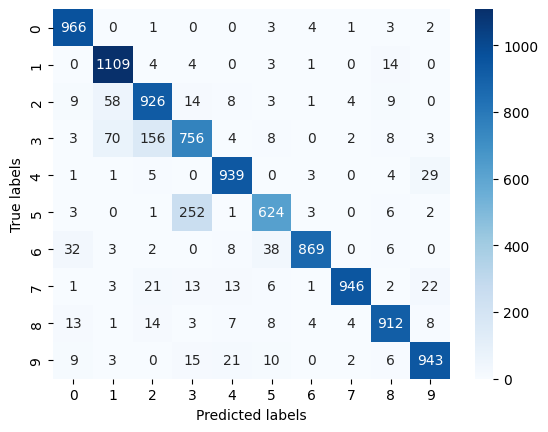

In [42]:
sns.heatmap(conf_mat, annot=True,  fmt='d',cmap='Blues')
plt.ylabel("True labels")
plt.xlabel("Predicted labels")

## Building a Predictive System

In [44]:
import cv2

In [86]:
img = cv2.imread("image3.jpg")

In [87]:
type(img)

numpy.ndarray

In [88]:
img.shape

(709, 711, 3)

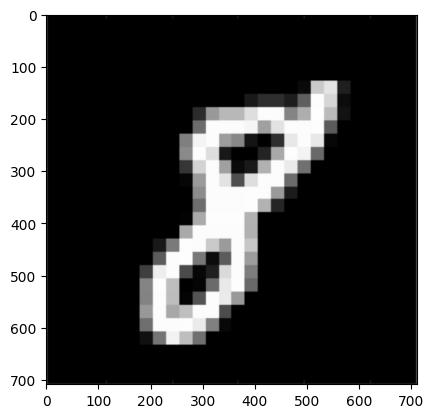

In [89]:
plt.imshow(img)

In [90]:
gray_scale = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

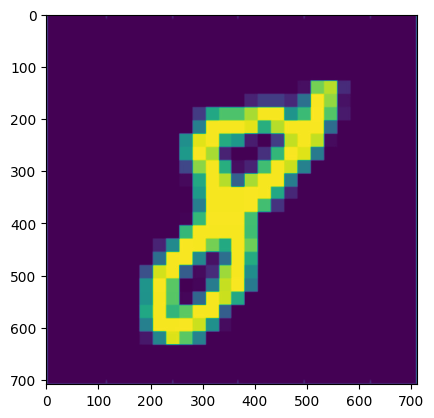

In [91]:
plt.imshow(gray_scale)

In [92]:
gray_scale.shape

(709, 711)

In [93]:
image_resize = cv2.resize(gray_scale, (28,28))

In [94]:
image_resize.shape

(28, 28)

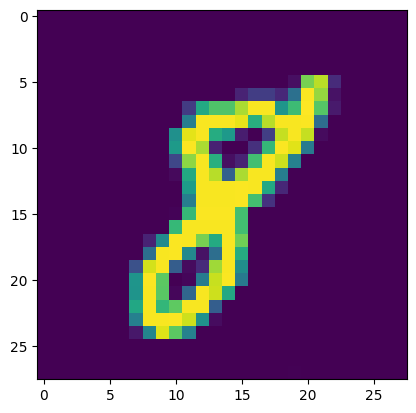

In [95]:
plt.imshow(image_resize)

In [96]:
image_resize = image_resize/255

In [97]:
image_reshape = np.reshape(image_resize, [1, 28, 28])

In [98]:
image_reshape.shape

(1, 28, 28)

In [99]:
pred = model.predict(image_reshape)

1/1 [==============================] - 0s 26ms/step


In [100]:
pred

array([[0.48312882, 0.40068102, 0.45098442, 0.38377067, 0.5339738 ,
        0.56563   , 0.43850237, 0.56812435, 0.61459523, 0.582134  ]],
      dtype=float32)

In [101]:
np.argmax(pred)

8